In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator[:30]

In [3]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                selectivity_average = ast.literal_eval(line)
            if i == 2:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average[:30], selectivity_std[:30]

In [4]:
def sparsity_val_extractor(file_name):
    sparsity_average = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
    return sparsity_average[:30]

In [5]:
def all_plotter(test_b1, sparsity_b1, selectivity_b1, test_b50, sparsity_b50, selectivity_b50, location='best'):
    fig, ax = plt.subplots(figsize=(12, 10))
    
    ax.plot(np.linspace(0.0, 30.0, num=30), test_b1, label='batch_size 1', c='royalblue')
    ax.plot(np.linspace(0.0, 30.0, num=30), sparsity_b1, label='batch_size 1 sparsity', c='cornflowerblue')
    ax.plot(np.linspace(0.0, 30.0, num=30), selectivity_b1, label='batch_size 1 selectivity', c='lightsteelblue')
    
    ax.plot(np.linspace(0.0, 30.0, num=30), test_b50, label='batch_size 50', c='indigo')
    ax.plot(np.linspace(0.0, 30.0, num=30), sparsity_b50, label='batch_size 50 sparsity', c='darkorchid')
    ax.plot(np.linspace(0.0, 30.0, num=30), selectivity_b50, label='batch_size 50 selectivity', c='violet')
    
    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location, bbox_to_anchor=(1, 0.5))
    plt.show()

# Graph format

In [17]:
def plotter(optmizer_name, flag=False):
    sparsity_b1 = sparsity_val_extractor(f'sparsity_batchsize_1_{optmizer_name}.txt')
    sparsity_b50 = sparsity_val_extractor(f'sparsity_batchsize_50_{optmizer_name}.txt')

    selectivity_b1_avg, selectivity_b1_std = selectivity_val_extractor(f'selectivity_batchsize_1_{optmizer_name}.txt')
    selectivity_b50_avg, selectivity_b50_std = selectivity_val_extractor(f'selectivity_batchsize_50_{optmizer_name}.txt')

    test_b1 = test_val_extractor(f'sparsity_batchsize_1_{optmizer_name}.txt')
    test_b50 = test_val_extractor(f'sparsity_batchsize_50_{optmizer_name}.txt')
    
    if flag==False:
        all_plotter(test_b1, sparsity_b1, selectivity_b1_avg, test_b50, sparsity_b50, selectivity_b50_avg)
    
    if flag==True:
        return test_b1, sparsity_b1, selectivity_b1_avg, selectivity_b1_std, test_b50, sparsity_b50, selectivity_b50_avg, selectivity_b50_std

# Compare values

In [18]:
def compare(optimizer_name, flag=True):
    test_b1, sparsity_b1, selectivity_b1_avg, selectivity_b1_std, test_b50, sparsity_b50, selectivity_b50_avg, selectivity_b50_std = plotter(optimizer_name, flag=True)
    print(f"{optimizer_name} b50: Test acc={test_b50[-1]:.3f}, Spar={sparsity_b50[-1]:.3f}, Selec avg={selectivity_b50_avg[-1]:.3f}, Selec std={selectivity_b50_std[-1]:.3f}")
    print(f"{optimizer_name} b1: Test acc={test_b1[-1]:.3f}, Spar={sparsity_b1[-1]:.3f}, Selec avg={selectivity_b1_avg[-1]:.3f}, Selec std={selectivity_b1_std[-1]:.3f}")
    print()
    print(len(test_b1))
    print(len(test_b50))

In [19]:
# 30 epoch 
print("Test accuracy / Sparsity / Selectivity on last epoch(30)\n")

compare('SGD')
compare('Adadelta')
compare('Adagrad')
compare('Adam')

Test accuracy / Sparsity / Selectivity on last epoch(30)

SGD b50: Test acc=0.971, Spar=0.222, Selec avg=0.320, Selec std=0.174
SGD b1: Test acc=0.982, Spar=0.652, Selec avg=0.661, Selec std=0.157

30
30
Adadelta b50: Test acc=0.982, Spar=0.327, Selec avg=0.406, Selec std=0.173
Adadelta b1: Test acc=0.980, Spar=0.241, Selec avg=0.298, Selec std=0.226

30
30
Adagrad b50: Test acc=0.980, Spar=0.603, Selec avg=0.646, Selec std=0.201
Adagrad b1: Test acc=0.981, Spar=0.629, Selec avg=0.668, Selec std=0.198

30
30
Adam b50: Test acc=0.981, Spar=0.289, Selec avg=0.371, Selec std=0.174
Adam b1: Test acc=0.978, Spar=0.501, Selec avg=0.547, Selec std=0.166

30
30


# SGD

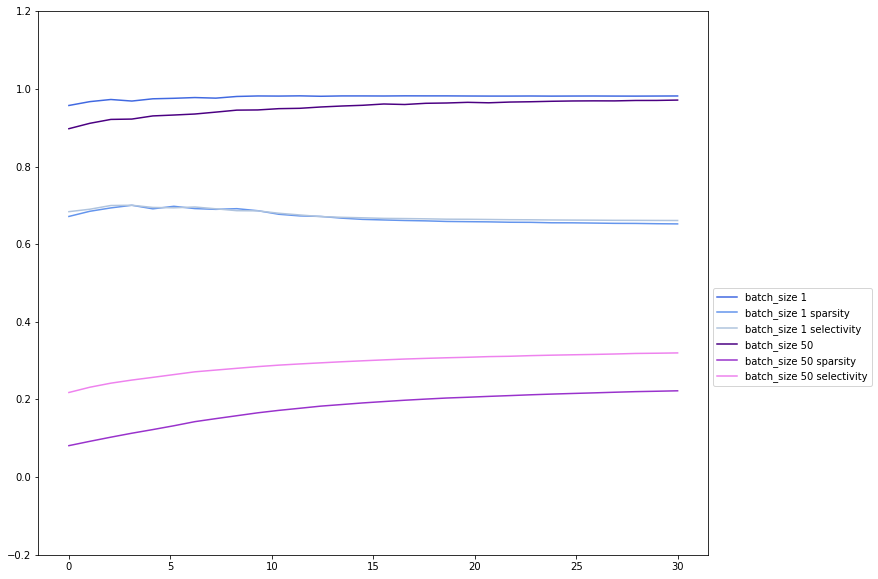

In [9]:
plotter('SGD')

# Adadelta

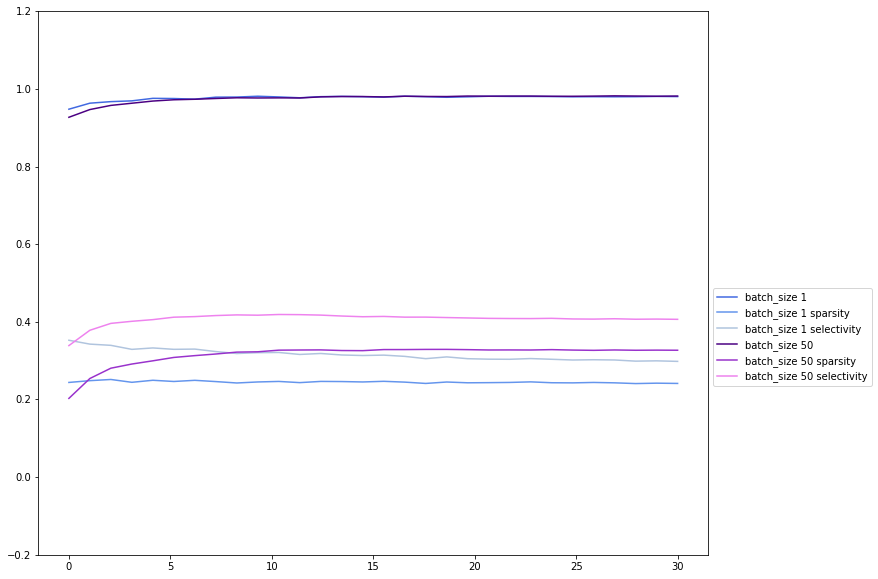

In [10]:
plotter('Adadelta')

# Adagrad

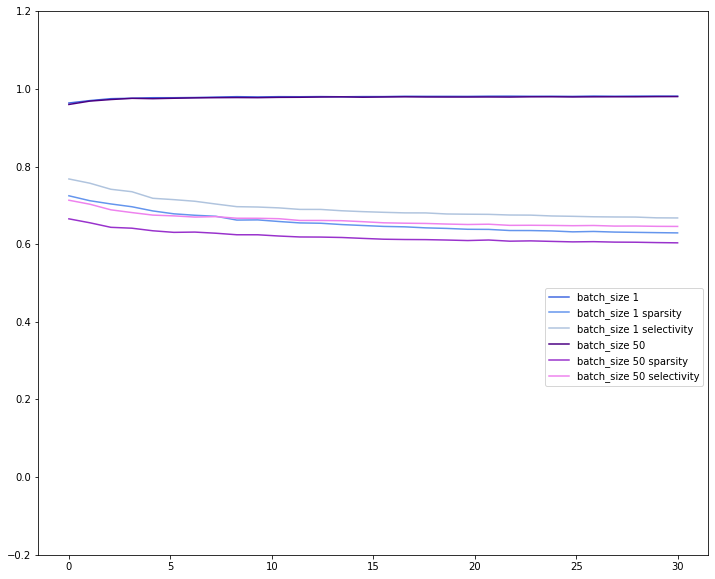

In [11]:
plotter('Adagrad')

# Adam

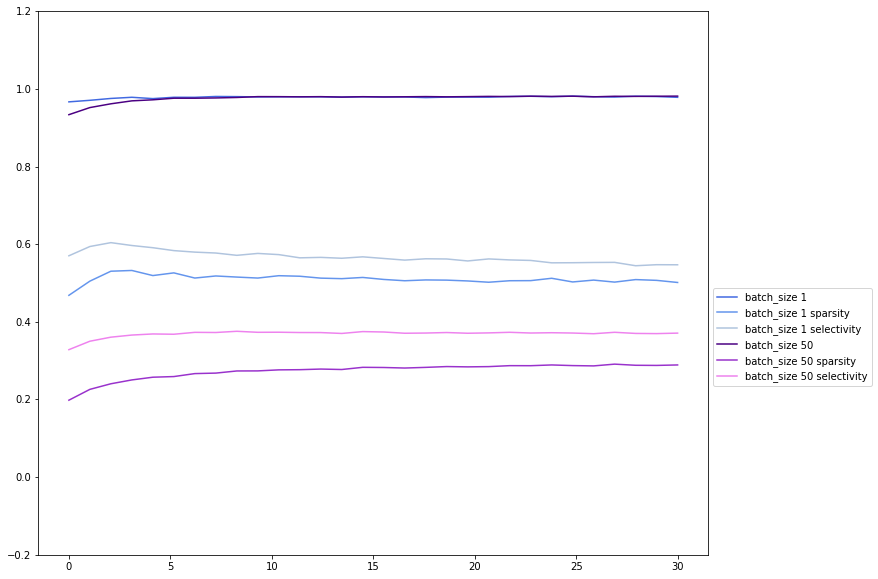

In [12]:
plotter('Adam')